# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import joblib
import os


# 2. Download NLTK Resources (Only Run Once)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 3. Initialize NLP Components

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# 4. Load Dataset

In [ ]:
df = pd.read_csv('ecommerceDataset.csv', quotechar='"', header=None, names=["label", "Text"])
print(df.shape)
df.head()

(50425, 2)


,label,Text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


# 5. Visualizing Class Distribution

<ipython-input-56-055e913ef581>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='coolwarm')


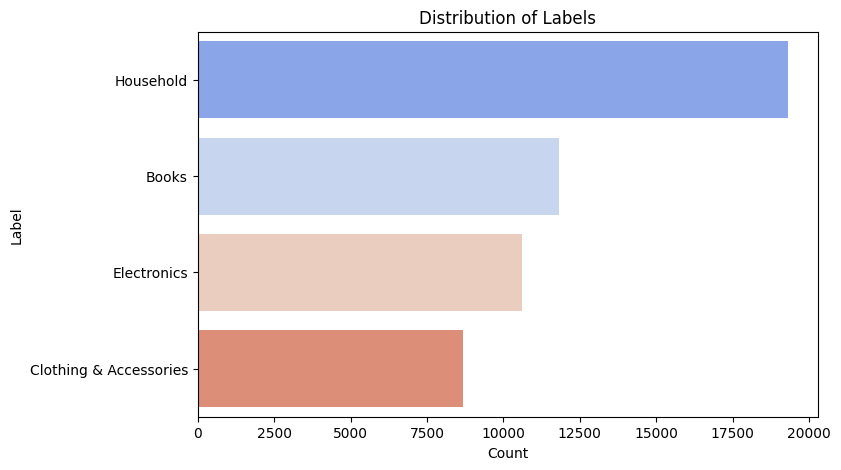

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Labels")
plt.xlabel("Count")
plt.ylabel("Label")
plt.show()

# 6. Encode Labels

In [ ]:
df['label_num'] = df['label'].map({
    'Household': 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

label_mapping = {
    0: 'Household',
    1: 'Books',
    2: 'Electronics',
    3: 'Clothing & Accessories'
}

# 7. Word Cloud Visualization

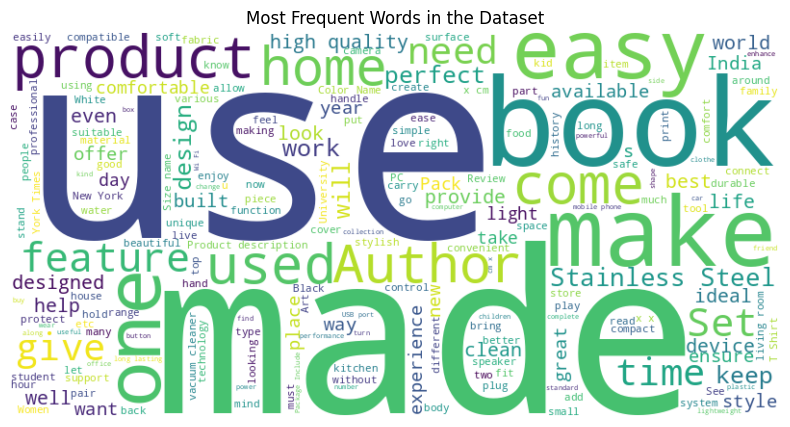

In [ ]:
text_corpus = " ".join(df['Text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in the Dataset")
plt.show()

# 8. Text Preprocessing Function

In [ ]:
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()
    text = re.sub(f'[{string.punctuation}]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = text.split()
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(processed_tokens)


# 9. Apply Preprocessing to Dataset

In [ ]:
df['preprocessed_text'] = df['Text'].apply(preprocess_text)

# 10. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_text, df.label_num, test_size=0.2, random_state=2022, stratify=df.label_num
)

X_train = X_train.fillna("")
X_test = X_test.fillna("")

# 11. Train K-Nearest Neighbors (KNN) Model

In [ ]:
clf_knn = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
     ('KNN', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8848785324739712
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      3863
           1       0.68      0.99      0.81      2364
           2       0.99      0.84      0.91      2124
           3       0.99      0.84      0.91      1734

    accuracy                           0.88     10085
   macro avg       0.91      0.88      0.89     10085
weighted avg       0.92      0.88      0.89     10085



# 12. Train Naive Bayes Model

In [ ]:
clf_nb = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
     ('MultinomialNB', MultinomialNB(alpha=0.1))
])
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9400099157164105
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3863
           1       0.97      0.90      0.94      2364
           2       0.94      0.92      0.93      2124
           3       0.96      0.97      0.96      1734

    accuracy                           0.94     10085
   macro avg       0.95      0.94      0.94     10085
weighted avg       0.94      0.94      0.94     10085



# 13. Train Random Forest Model

In [ ]:
clf_rf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
     ('Random Forest', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, random_state=42))
])
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9726326227069906
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      3863
           1       0.98      0.97      0.98      2364
           2       0.98      0.95      0.96      2124
           3       0.98      0.98      0.98      1734

    accuracy                           0.97     10085
   macro avg       0.98      0.97      0.97     10085
weighted avg       0.97      0.97      0.97     10085



# 14. Hyperparameter Tuning for Random Forest

In [ ]:
param_grid = {
    'Random Forest__n_estimators': [100, 200],
    'Random Forest__max_depth': [None, 20, 30],
    'vectorizer_tfidf__max_features': [3000, 5000]
}

grid_search = GridSearchCV(clf_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'Random Forest__max_depth': None, 'Random Forest__n_estimators': 200, 'vectorizer_tfidf__max_features': 5000}
Best cross-validation score: 0.961948387836915


:# 15. Model Comparison Visualization

<ipython-input-66-535e5ee54437>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette='viridis')


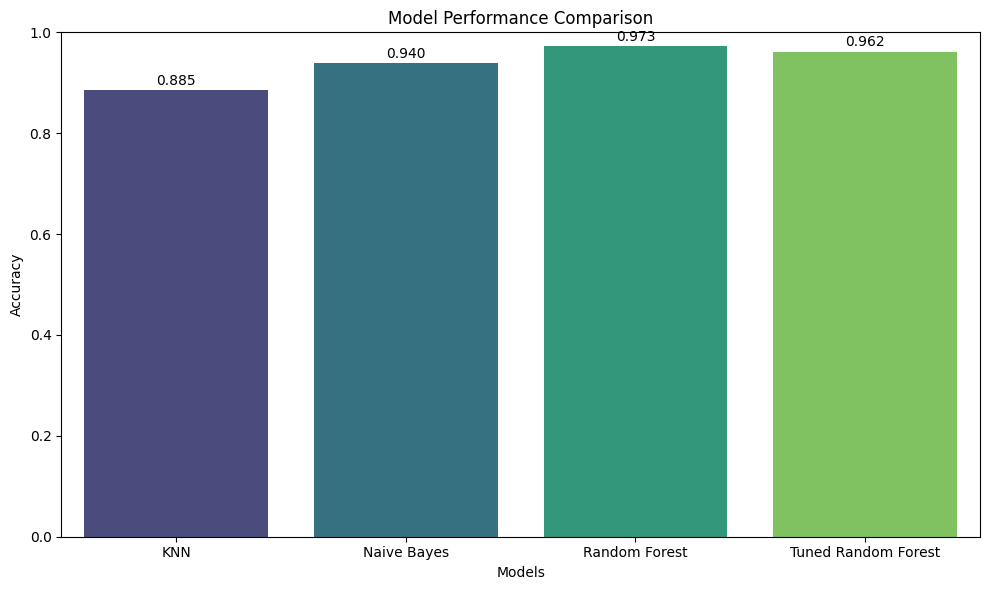

In [ ]:
models = ['KNN', 'Naive Bayes', 'Random Forest', 'Tuned Random Forest']
accuracies = [accuracy_knn, accuracy_nb, accuracy_rf, grid_search.best_score_]
plt.figure(figsize=(10,6))
ax = sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)

for i, acc in enumerate(accuracies):
    ax.text(i, acc + 0.01, f'{acc:.3f}', ha='center')

plt.tight_layout()
plt.show()

# 16. Confusion Matrix for the Best model : Random Forest

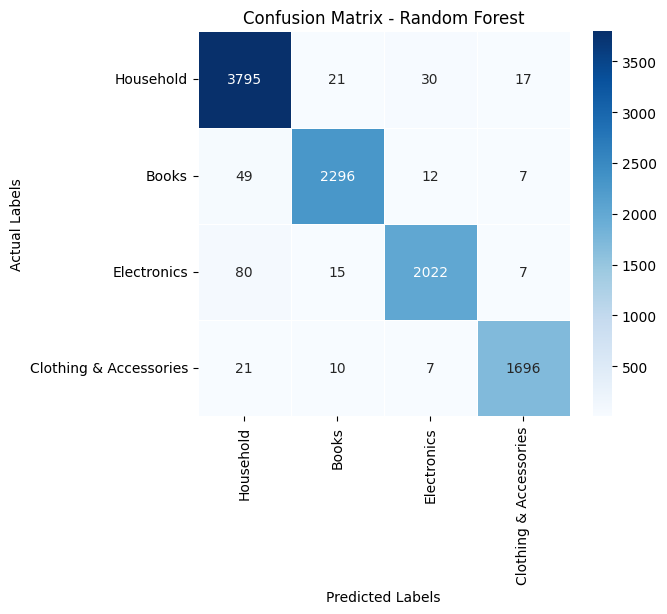

In [ ]:
# Get the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)  # y_test = actual values, rf_predictions = model predictions

# Define class labels
class_labels = ["Household", "Books", "Electronics", "Clothing & Accessories"]

# Convert to DataFrame
cm_df_rf = pd.DataFrame(cm_rf, index=class_labels, columns=class_labels)

# Plot using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm_df_rf, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 17. Save Best Model

In [ ]:
os.makedirs('models', exist_ok=True)
joblib.dump(grid_search.best_estimator_, 'models/ecommerce_classifier.pkl')
joblib.dump(label_mapping, 'models/label_mapping.pkl')
print("Model and label mapping saved successfully!")

Model and label mapping saved successfully!


# 18. Load Model and Make Predictions

In [ ]:
def load_model():
    model = joblib.load('models/ecommerce_classifier.pkl')
    label_mapping = joblib.load('models/label_mapping.pkl')
    return model, label_mapping

def predict_category(text):
    model, label_mapping = load_model()
    preprocessed_text = preprocess_text(text)
    predicted_label_num = model.predict([preprocessed_text])[0]
    predicted_category = label_mapping[predicted_label_num]

    if hasattr(model, "predict_proba"):
        probabilities = model.predict_proba([preprocessed_text])[0]
        probability = float(probabilities[predicted_label_num])
        if (probability < 0.5) or (predicted_category == "Books" and probability < 0.9436):
          predicted_category = "NaN"
        return predicted_category, probability
    else:
        return predicted_category, None
sample_text = "laptop"
print(predict_category(sample_text))

('Electronics', 0.8264864608357795)
